# 1) Cargamos los datos 📕

In [11]:
import pandas as pd
data = pd.read_csv("data/ohe_customer_dataset.csv", sep=",")

##### **Aclaración:** Podrían analizar todas las columnas, pero en este caso nos parece relevante solo analizar algunas columnas:

In [12]:
filter_data = data[["orderState_failed", "orderState_fulfilled", "orderState_pending", "transactionFailed", "fraudulent", "customerIPAddressSimplified_digits_and_letters"]].copy()

# 4) Clustering con K-Means 🎯

### Haremos todo el análisis para el dataframe `filter_data`

## 4.2) Creación del modelo

In [4]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(filter_data)
x_data_norm=std_scaler.transform(filter_data)

pd.DataFrame(x_data_norm).describe()

,0,1,2,3,4,5
count,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02
mean,5.702590e-18,4.562072e-17,-2.281036e-17,4.847202e-17,-9.124144e-17,-2.281036e-17
std,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00
min,-2.953981e-01,-1.339299e+00,-2.169305e-01,-6.076436e-01,-2.028993e+00,-3.755338e-01
25%,-2.953981e-01,-1.339299e+00,-2.169305e-01,-6.076436e-01,-7.271779e-01,-3.755338e-01
50%,-2.953981e-01,7.466592e-01,-2.169305e-01,-6.076436e-01,5.746377e-01,-3.755338e-01
75%,-2.953981e-01,7.466592e-01,-2.169305e-01,1.645701e+00,5.746377e-01,-3.755338e-01
max,3.385262e+00,7.466592e-01,4.609772e+00,1.645701e+00,5.746377e-01,2.662876e+00


In [5]:
# Crear Modelo
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters=3,     
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(x_data_norm)

KMeans(max_iter=100, n_clusters=3, n_init='auto', random_state=0)

In [10]:
pred_cl = cl_model.predict(x_data_norm)

# Número de cluster: 
pred_cl

array([0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2,
       1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [6]:
cl_model

KMeans(max_iter=100, n_clusters=3, n_init='auto', random_state=0)

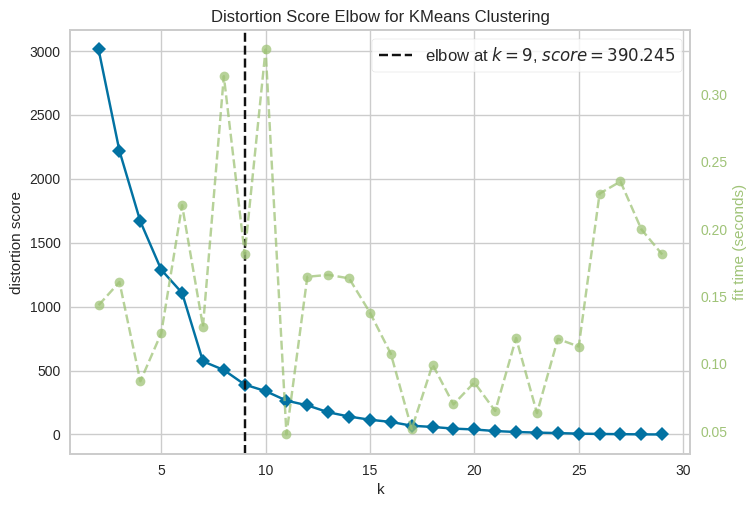

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=100, n_clusters=29, n_init='auto',
                                  random_state=0),
                 k=(2, 30))

In [8]:
from copy import deepcopy
from yellowbrick.cluster.elbow import kelbow_visualizer

cl_model2=deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2, x_data_norm, k=(2,30), locate_elbow=True)

## 4.4) Analizando el modelo final: 'Gráfico de coordenadas'

### Hacemos copia de los datos y le agregamos el cluster:

In [6]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=filter_data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl[cluster_var]=cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados
x_data_cl.head()

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0,0,1,False,0,0,0
1,0,1,0,False,1,0,0
2,0,1,0,False,0,1,2
3,0,1,0,False,0,1,2
4,0,1,0,True,1,0,0


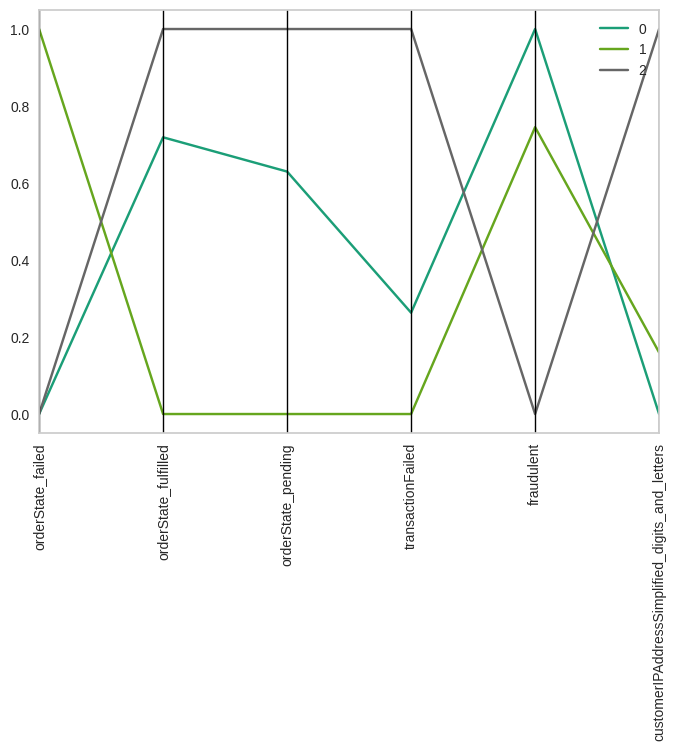

In [10]:
from funpymodeling.model_validation import coord_plot
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

#### *Generen 3 insights que les llamo la atención a partir del gráfico*

In [ ]:
# 0 - Los IP con numeros y letras no suelen ser fraudulentos por mas que las transacciones no funcionen muy correctamente 
# 1 - Si falla la orden, es logico que nunca se termine o que quede pendiente o que falle, 
                        #y en esos hay un 70% de fraude
# 2 - Los IP con numeros tuvieron menos fallas para hacer la transaccion, pero tiene 100% casos de fraude
                        # invento mi pelicula, al ser fraudulentos tienen mas conocimientos y pudieron sortear mejor el complejo sistema de pedidos
                        # y como saben que los numeros y letras IP son sospechosos van por el lado bueno para ser mas sutiles, guante blanco, ladrones de traje

# 3 - Siguiendo mi intuicion, pareceria que la linea de fraudulent estuviera al reves


In [12]:
# quiero ver en numeros la relacion entre cluster y fraudulent
x_data_cl.groupby(['cluster', 'fraudulent']).size()

cluster  fraudulent
0        0              48
         1              31
         2             425
1        0              11
         1               9
         2              30
2        0              48
         1              21
dtype: int64

In [ ]:
# Desconfio un poco de este resultado en relacion a los que es fraudulent
# Ordeno mas por el estado de la orden creo

## Bonus: Scatter 3D!

In [13]:
import plotly.express as px

fig = px.scatter_3d(filter_data, x='orderState_failed', y='customerIPAddressSimplified_digits_and_letters', z='transactionFailed', color='fraudulent')
fig.show()

# 5) Clustering con HDBSCAN 🤖

## 5.2) Tuning/regularización de HDBSCAN para menos clusters

In [16]:
#!pip3 install hdbscan

  Using cached hdbscan-0.8.33.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  error: subprocess-exited-with-error
  
  × Building wheel for hdbscan (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [43 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-310
      creating build/lib.linux-x86_64-cpython-310/hdbscan
      copying hdbscan/flat.py -> build/lib.linux-x86_64-cpython-310/hdbscan
      copying hdbscan/prediction.py -> build/lib.linux-x86_64-cpython-310/hdbscan
      copying hdbscan/__init__.py -> build/lib.linux-x86_64-cpython-310/hdbscan
      copying hdbscan/validity.py -> build/lib.linux-x86_64-cpython-310/hdbscan
      copying hdbscan/hd

In [18]:
#import hdbscan

ModuleNotFoundError: No module named 'hdbscan'

In [ ]:
# Debido al crash lo hice en Colab
# Tambien tuve mis inconvenientes hasta que... magia!
# https://colab.research.google.com/drive/1T_L_WrmhY7iXVv69N1mlP3jkVvFxK6uR?usp=sharing